<a href="https://colab.research.google.com/github/vinidias/EDA-Airbnb-RJ/blob/main/EDA_RJ_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Libraries**

In [27]:
!pip install pywaffle -q
!pip install wordcloud -q


     |████████████████████████████████| 526 kB 29.8 MB/s 


In [29]:
import pandas as pd

import numpy as np

import matplotlib

import matplotlib.pyplot as plt

import seaborn as sns

from pywaffle import Waffle

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.corpus import stopwords

%matplotlib inline

**Load The Data**

In [88]:
rj_df = pd.read_csv("http://data.insideairbnb.com/canada/on/ottawa/2021-09-16/visualisations/listings.csv")

In [ ]:
rj_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96599,-43.17940,Entire home/apt,350,4,265,2021-05-21,2.07,1,314,12,NaN
1,24480,"Nice and cozy near Ipanema Beach, w/ home office",99249,Goya,NaN,Ipanema,-22.98405,-43.20189,Entire home/apt,297,3,85,2017-04-22,0.86,1,30,0,NaN
2,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97735,-43.19105,Entire home/apt,160,7,238,2019-04-27,1.86,2,266,0,NaN
3,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98839,-43.19232,Entire home/apt,271,2,181,2019-12-06,1.92,1,151,0,NaN
4,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98107,-43.19136,Entire home/apt,121,3,371,2019-06-15,3.05,1,30,35,NaN


Drop unnecessary collumns

In [ ]:
rj_df.drop(['id','name','host_name','last_review'], axis=1, inplace=True)

print(rj_df.head())

   host_id  neighbourhood_group  ... number_of_reviews_ltm  license
0    68997                  NaN  ...                    12      NaN
1    99249                  NaN  ...                     0      NaN
2   102840                  NaN  ...                     0      NaN
3   153232                  NaN  ...                     0      NaN
4   153691                  NaN  ...                    35      NaN

[5 rows x 14 columns]


Replacing all NaN values in "review_per_month" with 0

In [5]:
rj_df.reviews_per_month.fillna(0, inplace=True)

print(rj_df.isnull().any())

id                                False
name                               True
host_id                           False
host_name                          True
neighbourhood_group                True
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
number_of_reviews_ltm             False
license                            True
dtype: bool


Grouping neighbourhoods 


In [8]:
zonas_dict = {
'Botafogo': 'Zona-Sul', 
'Catete': 'Zona-Sul', 
'Copacabana': 'Zona-Sul', 
'Cosme Velho': 'Zona-Sul', 
'Flamengo': 'Zona-Sul' ,
'Gávea': 'Zona-Sul' ,
'Glória': 'Zona-Sul',
'Humaitá': 'Zona-Sul', 
'Ipanema': 'Zona-Sul' ,
'Jardim Botânico': 'Zona-Sul', 
'Lagoa': 'Zona-Sul' ,
'Laranjeiras': 'Zona-Sul' ,
'Leblon': 'Zona-Sul' ,
'Leme': 'Zona-Sul' ,
'São Conrado': 'Zona-Sul' ,
'Urca': 'Zona-Sul' ,
'Vidigal': 'Zona-Sul' ,
'Rocinha': 'Zona-Sul',

'Alto da Boa Vista': 'Zona-Norte' ,
'Andaraí': 'Zona-Norte'  ,
'Grajaú': 'Zona-Norte'  ,
'Maracanã': 'Zona-Norte'  ,
'Praça da Bandeira': 'Zona-Norte'  ,
'Tijuca': 'Zona-Norte'  ,
'Vila Isabel Abolição': 'Zona-Norte'  ,
'Água Santa': 'Zona-Norte'  ,
'Cachambi': 'Zona-Norte'  ,
'Encantado': 'Zona-Norte'  ,
'Engenho de Dentro': 'Zona-Norte' ,
'Engenho Novo': 'Zona-Norte'  ,
'Higienópolis': 'Zona-Norte'  ,
'Jacaré': 'Zona-Norte'  ,
'Jacarezinho': 'Zona-Norte'  ,
'Lins de Vasconcelos': 'Zona-Norte'  ,
'Manguinhos': 'Zona-Norte'  ,
'Maria da Graça': 'Zona-Norte'  ,
'Méier': 'Zona-Norte'  ,
'Piedade': 'Zona-Norte'  ,
'Pilares': 'Zona-Norte'  ,
'Riachuelo': 'Zona-Norte'  ,
'Rocha': 'Zona-Norte'  ,
'Sampaio': 'Zona-Norte'  ,
'São Francisco Xavier': 'Zona-Norte'  ,
'Todos os Santos': 'Zona-Norte'  ,
'Bonsucesso': 'Zona-Norte'  ,
'Bancários': 'Zona-Norte'  ,
'Cacuia': 'Zona-Norte'  ,
'Cidade Universitária': 'Zona-Norte'  ,
'Cocotá': 'Zona-Norte'  ,
'Freguesia': 'Zona-Norte'  ,
'Galeão': 'Zona-Norte'  ,
'Jardim Carioca': 'Zona-Norte'  ,
'Jardim Guanabara': 'Zona-Norte'  ,
'Maré ': 'Zona-Norte' ,
'Moneró ': 'Zona-Norte' ,
'Olaria': 'Zona-Norte'  ,
'Pitangueiras': 'Zona-Norte'  ,
'Portuguesa': 'Zona-Norte'  ,
'Praia da Bandeira': 'Zona-Norte'  ,
'Ramos': 'Zona-Norte'  ,
'Ribeira': 'Zona-Norte'  ,
'Tauá': 'Zona-Norte'  ,
'Zumbi': 'Zona-Norte'  ,
'Acari': 'Zona-Norte'  ,
'Anchieta': 'Zona-Norte' ,
'Barros Filho': 'Zona-Norte'  ,
'Bento Ribeiro': 'Zona-Norte'  ,
'Brás de Pina': 'Zona-Norte'  ,
'Campinho': 'Zona-Norte'  ,
'Cavalcanti': 'Zona-Norte'  ,
'Cascadura': 'Zona-Norte'  ,
'Coelho Neto': 'Zona-Norte'  ,
'Colégio': 'Zona-Norte'  ,
'Complexo do Alemão': 'Zona-Norte'  ,
'Cordovil': 'Zona-Norte'  ,
'Costa Barros': 'Zona-Norte'  ,
'Engenheiro Leal': 'Zona-Norte'  ,
'Engenho da Rainha': 'Zona-Norte'  ,
'Guadalupe': 'Zona-Norte'  ,
'Honório Gurgel': 'Zona-Norte'  ,
'Inhaúma': 'Zona-Norte'  ,
'Irajá': 'Zona-Norte'  ,
'Jardim América': 'Zona-Norte'  ,
'Madureira': 'Zona-Norte'  ,
'Marechal Hermes': 'Zona-Norte'  ,
'Oswaldo Cruz': 'Zona-Norte'  ,
'Parada de Lucas': 'Zona-Norte'  ,
'Parque Anchieta': 'Zona-Norte'  ,
'Parque Colúmbia': 'Zona-Norte'  ,
'Pavuna': 'Zona-Norte'  ,
'Penha': 'Zona-Norte'  ,
'Penha Circular': 'Zona-Norte'  ,
'Quintino Bocaiuva': 'Zona-Norte'  ,
'Ricardo de Albuquerque': 'Zona-Norte'  ,
'Rocha Miranda': 'Zona-Norte'  ,
'Tomás Coelho': 'Zona-Norte'  ,
'Turiaçu': 'Zona-Norte'  ,
'Vaz Lobo': 'Zona-Norte',
'Vicente de Carvalho': 'Zona-Norte'  ,
'Vigário Geral': 'Zona-Norte'  ,
'Vila da Penha': 'Zona-Norte'  ,
'Vila Kosmos': 'Zona-Norte'  ,
'Vista Alegre': 'Zona-Norte' ,

'Anil': 'Zona-Oeste' ,
'Barra da Tijuca': 'Zona-Oeste'  ,
'Camorim': 'Zona-Oeste'  ,
'Cidade de Deus': 'Zona-Oeste'  ,
'Curicica': 'Zona-Oeste'  ,
'Freguesia de Jacarepaguá': 'Zona-Oeste'  ,
'Gardênia Azul': 'Zona-Oeste'  ,
'Grumari': 'Zona-Oeste'  ,
'Itanhangá': 'Zona-Oeste'  ,
'Jacarepaguá': 'Zona-Oeste'  ,
'Joá': 'Zona-Oeste'  ,
'Praça Seca': 'Zona-Oeste'  ,
'Pechincha': 'Zona-Oeste'  ,
'Rio das Pedras': 'Zona-Oeste'  ,
'Recreio dos Bandeirantes': 'Zona-Oeste'  ,
'Tanque': 'Zona-Oeste'  ,
'Taquara': 'Zona-Oeste'  ,
'Vargem Grande': 'Zona-Oeste'  ,
'Vargem Pequena': 'Zona-Oeste'  ,
'Vila Valqueire': 'Zona-Oeste'  ,
'Jardim Sulacap': 'Zona-Oeste' ,
'Bangu': 'Zona-Oeste'  ,
'Campo dos Afonsos': 'Zona-Oeste'  ,
'Deodoro': 'Zona-Oeste'  ,
'Gericinó': 'Zona-Oeste'  ,
'Jabour': 'Zona-Oeste'  ,
'Magalhães Bastos': 'Zona-Oeste'  ,
'Padre Miguel': 'Zona-Oeste'  ,
'Realengo': 'Zona-Oeste'  ,
'Santíssimo': 'Zona-Oeste'  ,
'Senador Camará': 'Zona-Oeste'  ,
'Vila Kennedy': 'Zona-Oeste'  ,
'Vila Militar': 'Zona-Oeste' ,
'Barra de Guaratiba': 'Zona-Oeste' , 
'Campo Grande': 'Zona-Oeste'  ,
'Cosmos': 'Zona-Oeste'  ,
'Guaratiba': 'Zona-Oeste'  ,
'Inhoaíba': 'Zona-Oeste'  ,
'Paciência': 'Zona-Oeste'  ,
'Pedra de Guaratiba': 'Zona-Oeste'  ,
'Santa Cruz': 'Zona-Oeste'  ,
'Senador Vasconcelos': 'Zona-Oeste'  ,
'Sepetiba': 'Zona-Oeste',

'Bairro Imperial de São Cristóvão': 'Zona-Central' ,
'Benfica': 'Zona-Central'  ,
'Caju': 'Zona-Central'  ,
'Catumbi': 'Zona-Central'  ,
'Centro': 'Zona-Central'  ,
'Cidade Nova': 'Zona-Central'  ,
'Estácio': 'Zona-Central'  ,
'Gamboa': 'Zona-Central'  ,
'Lapa': 'Zona-Central'  ,
'Mangueira': 'Zona-Central'  ,
'Paquetá': 'Zona-Central'  ,
'Rio Comprido': 'Zona-Central'  ,
'Santa Teresa': 'Zona-Central'  ,
'Santo Cristo': 'Zona-Central'  ,
'Saúde': 'Zona-Central'  ,
'Vasco da Gama': 'Zona-Central' ,
}
rj_df['Zona'] = rj_df['neighbourhood'].map(zonas_dict)
print(rj_df)

             id  ...        Zona
0         17878  ...    Zona-Sul
1         24480  ...    Zona-Sul
2         25026  ...    Zona-Sul
3         35636  ...    Zona-Sul
4         35764  ...    Zona-Sul
...         ...  ...         ...
23409  52486233  ...    Zona-Sul
23410  52490061  ...    Zona-Sul
23411  52490411  ...    Zona-Sul
23412  52493506  ...  Zona-Oeste
23413  52494052  ...  Zona-Oeste

[23414 rows x 19 columns]


Frequency Distribuition

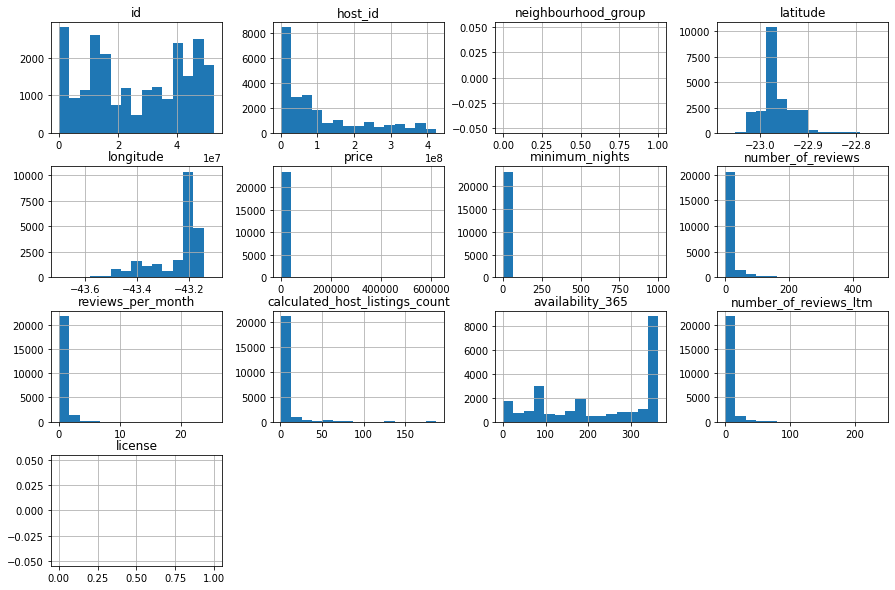

In [9]:
rj_df.hist(bins=15, figsize=(15,10))
plt.show()

Researching Outliers

In [10]:
rj_df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,23414.000000,23414.000000,23414.000000,23414.000000,23414.000000,23414.000000
mean,715.051166,5.286965,14.075639,0.418422,7.226787,229.193004
std,4948.359542,20.850200,33.261309,0.791954,21.690645,130.210901
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,150.000000,1.000000,0.000000,0.000000,1.000000,90.000000
50%,270.000000,2.000000,2.000000,0.080000,1.000000,264.000000
75%,550.000000,4.000000,11.000000,0.480000,3.000000,362.000000
max,621850.000000,1000.000000,486.000000,25.520000,187.000000,365.000000


Boxplot minimun_nights

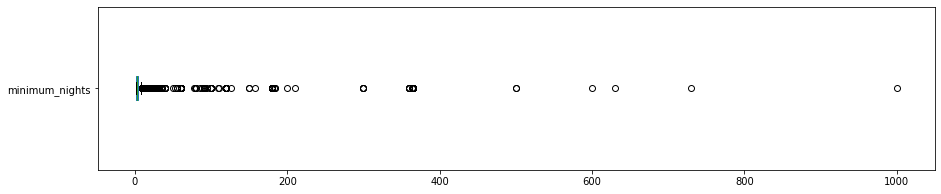

minimum_nights: valores acima de 30:
265 entradas
1.1318%


In [11]:
rj_df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

print("minimum_nights: greather than 30:")
print("{} entradas".format(len(rj_df[rj_df.minimum_nights > 30])))
print("{:.4f}%".format((len(rj_df[rj_df.minimum_nights > 30]) / rj_df.shape[0])*100))

Boxplot price

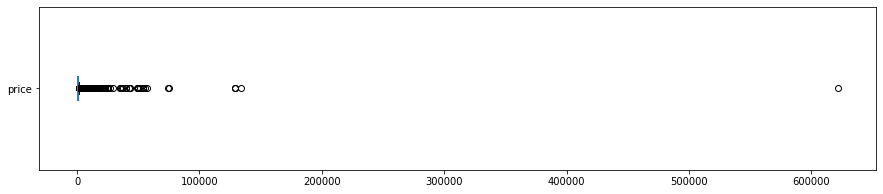


price: values greather than 1500
1634 entradas
6.9787%


In [12]:
rj_df['price'].plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: values greather than 1500")
print("{} entradas".format(len(rj_df[rj_df['price'] > 1500])))
print("{:.4f}%".format((len(rj_df[rj_df['price'] > 1500]) / rj_df.shape[0])*100))

Handle Outliers and Drop Unused Collumns

[]

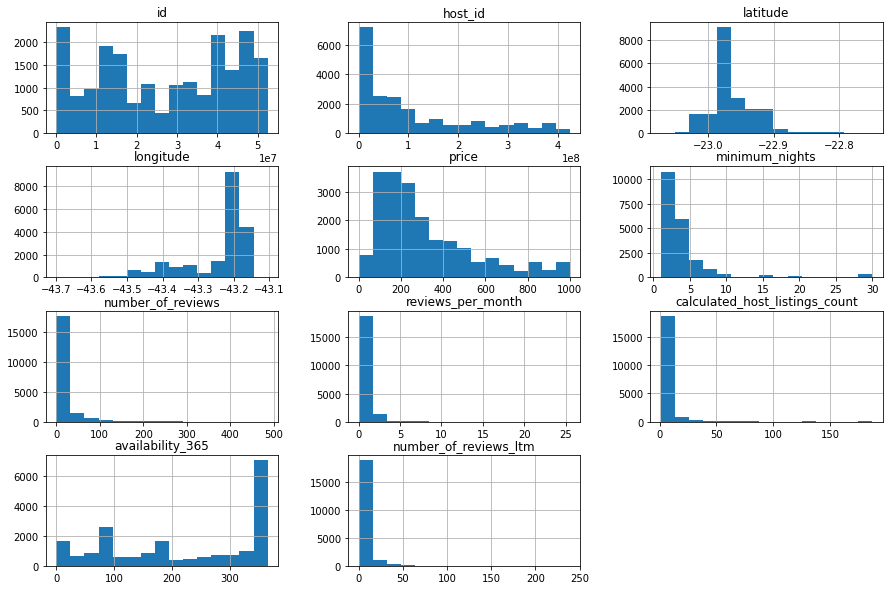

In [14]:
rj_df_clean = rj_df.copy()
rj_df_clean.drop(rj_df_clean[rj_df_clean['price'] > 1500].index, axis=0, inplace=True)
rj_df_clean.drop(rj_df_clean[rj_df_clean.price > 1000].index, axis=0, inplace=True)
rj_df_clean.drop(rj_df_clean[rj_df_clean.minimum_nights > 30].index, axis=0, inplace=True)

rj_df_clean.drop('neighbourhood_group', axis=1, inplace=True)
rj_df_clean.drop('license', axis=1, inplace=True)
rj_df_clean.hist(bins=15, figsize=(15,10))

plt.plot()

**Exploration Data and Visualizing**

Average Rent Price

In [75]:
# see the average of the `price`` column
print("Average in Reais: R$" + str(rj_df_clean['price'].mean()))

Average in Reais: R$310.9177927927928


In [76]:
# Average of `minimum_nights` column
rj_df_clean['minimum_nights'].mean()

3.545045045045045

The average minimum night price for a property in Rio is equivalent to approximately 4, which indicates that people usually stay in a Rio property in half a week, which can be the first few days or a weekend .

Room Details


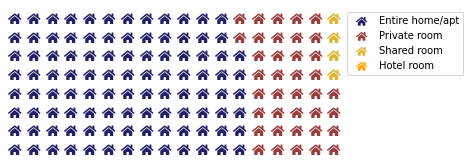

Entire home/apt    14420
Private room        5413
Shared room          517
Hotel room            74
Name: room_type, dtype: int64


In [31]:
# show the amount of each type of property available

data = dict(rj_df_clean['room_type'].value_counts())

fig = plt.figure(
    FigureClass=Waffle,
    rows=8,
    columns=18,
    colors=("#232066", "#983D3D", "#DCB732", "#FFA500"),
    values=data, icons='home', icon_size=12,
    legend={'loc': 'upper left', 'bbox_to_anchor': (1,1)},
    icon_legend=True
)

fig.set_tight_layout(False)
plt.show();
print(rj_df_clean.room_type.value_counts())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


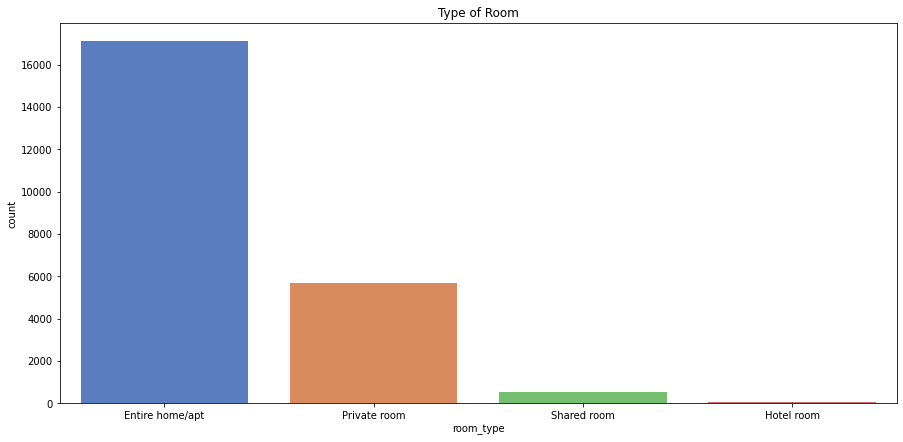

In [34]:
# show the amount of each type of property available
plt.figure(figsize=(15,7))

plt.title("Type of Room")

sns.countplot(rj_df.room_type, palette="muted")
fig = plt.gcf()

plt.show()

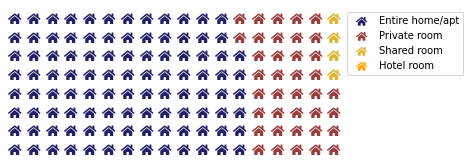

Entire home/apt    0.706032
Private room       0.265031
Shared room        0.025313
Hotel room         0.003623
Name: room_type, dtype: float64


In [33]:
# Show the percentage of each type of property available

data = dict(rj_df_clean['room_type'].value_counts()/ rj_df_clean.shape[0])

fig = plt.figure(
    FigureClass=Waffle,
    rows=8,
    columns=18,
    colors=("#232066", "#983D3D", "#DCB732", "#FFA500"),
    values=data, icons='home', icon_size=12,
    legend={'loc': 'upper left', 'bbox_to_anchor': (1,1)},
    icon_legend=True
)

fig.set_tight_layout(False)
plt.show();
print((rj_df_clean.room_type.value_counts() / rj_df_clean.shape[0]))

What is the most expensive location in the dataset?

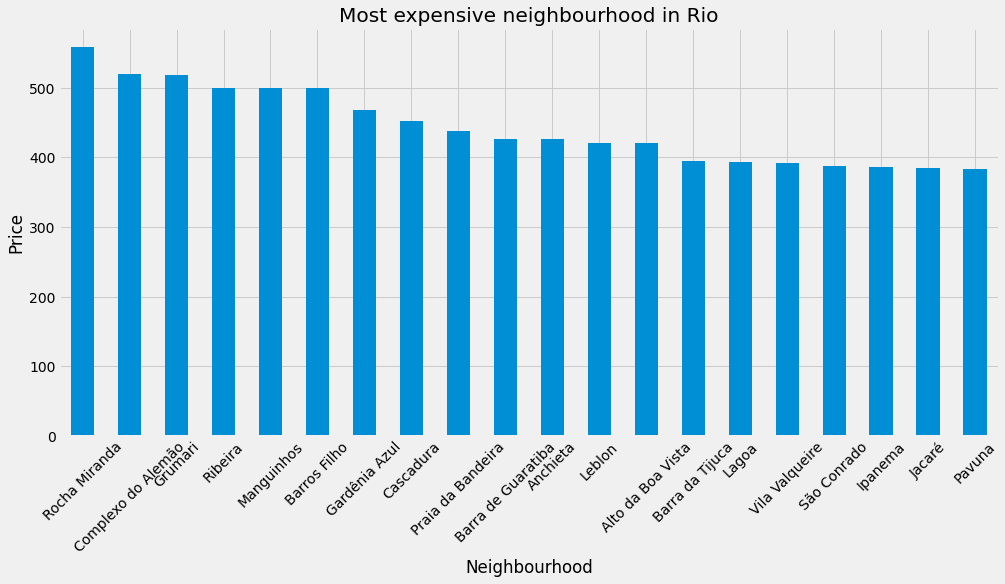

neighbourhood
Rocha Miranda         558.000000
Complexo do Alemão    520.000000
Grumari               519.000000
Ribeira               500.000000
Manguinhos            500.000000
Barros Filho          500.000000
Gardênia Azul         467.450000
Cascadura             452.500000
Praia da Bandeira     437.666667
Barra de Guaratiba    426.287879
Anchieta              426.000000
Leblon                420.640046
Alto da Boa Vista     420.000000
Barra da Tijuca       394.195213
Lagoa                 392.812865
Vila Valqueire        391.294118
São Conrado           387.265487
Ipanema               386.659149
Jacaré                384.750000
Pavuna                383.500000
Name: price, dtype: float64


In [55]:
# see prices by neighbourhood, on average
plt.figure(figsize=(15,7))
rj_df_clean.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=False)[:20].plot(kind='bar')
plt.title('Most expensive neighbourhood in Rio')


plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

print(rj_df_clean.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=False)[:20])

Cheaper Neighborhoods

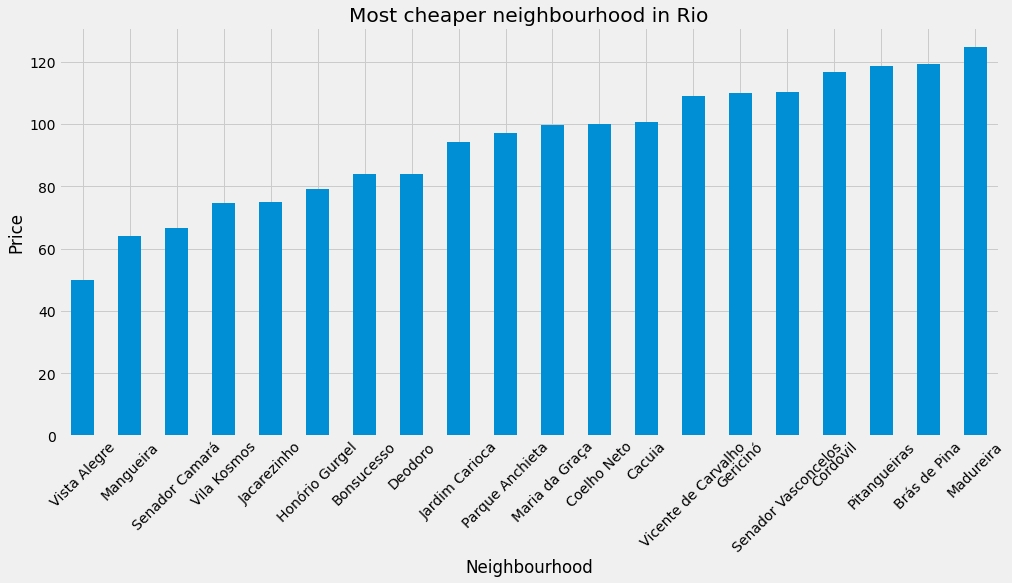

neighbourhood
Vista Alegre            50.000000
Mangueira               64.000000
Senador Camará          66.666667
Vila Kosmos             74.500000
Jacarezinho             75.000000
Honório Gurgel          79.000000
Bonsucesso              83.866667
Deodoro                 84.000000
Jardim Carioca          94.333333
Parque Anchieta         97.000000
Maria da Graça          99.571429
Coelho Neto            100.142857
Cacuia                 100.500000
Vicente de Carvalho    109.000000
Gericinó               110.000000
Senador Vasconcelos    110.200000
Cordovil               116.666667
Pitangueiras           118.500000
Brás de Pina           119.400000
Madureira              124.800000
Name: price, dtype: float64


In [56]:
# see prices by neighbourhood, on average
plt.figure(figsize=(15,7))
rj_df_clean.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=True)[:20].plot(kind='bar')
plt.title('Most cheaper neighbourhood in Rio')


plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

print(rj_df_clean.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=True)[:20])

Is it possible to stay at Leblon paying cheap on the daily rate? That's what I'll check next.


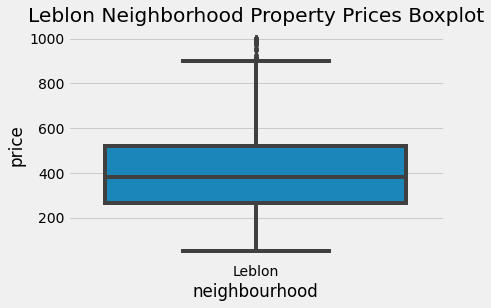

In [61]:
# boxplot
sns.boxplot(x = "neighbourhood", y="price", data=rj_df_clean.loc[rj_df_clean['neighbourhood'] == 'Leblon'])
plt.title("Leblon Neighborhood Property Prices Boxplot")
plt.show()

In [62]:
# Applying descriptive statistics to see the exact value
rj_df_clean['price'].loc[rj_df_clean['neighbourhood'] == 'Leblon'].describe()

count     864.000000
mean      420.640046
std       216.412060
min        53.000000
25%       264.000000
50%       382.000000
75%       520.250000
max      1000.000000
Name: price, dtype: float64

Note that 25% of real estate prices in Leblon are below 264 reais. So, it is possible to stay in the most expensive neighborhood in Paris for little. Here is the list of neighborhoods:

In [65]:
# List with the cheapest properties in the Leblon neighborhood
cheaper_leblon = rj_df_clean[rj_df_clean['neighbourhood'] == 'Leblon'].loc[rj_df['price'] <= 264]

In [67]:
cheaper_leblon.head(10)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,Zona
26,86670,AMAZING VIEW ON THE LEBLON/IPANEMA BOARDER.,474221,June,Leblon,-22.98361,-43.21827,Entire home/apt,246,2,86,2019-10-13,0.73,6,129,7,Zona-Sul
58,137048,Charming 2 bedroom flat in Leblon,670198,Clarisse,Leblon,-22.98175,-43.22492,Entire home/apt,200,3,35,2011-09-25,0.61,1,247,3,Zona-Sul
198,331088,Leblon Beach /Gávea The Best placee,530231,Yaya,Leblon,-22.97890,-43.22399,Private room,105,1,45,2019-09-30,0.41,4,354,0,Zona-Sul
286,488190,Private room&bathroom&Leblon,2415244,Isaura,Leblon,-22.98441,-43.22771,Private room,250,5,5,2020-02-25,0.08,3,271,0,Zona-Sul
617,924693,Beautiful Large Ensuite in Leblon!!,4974044,Nina,Leblon,-22.97843,-43.22378,Private room,200,1,13,2014-07-02,0.15,1,360,0,Zona-Sul
687,1033727,Ipiabas Leblon,5689207,Paulo,Leblon,-22.98491,-43.22132,Entire home/apt,235,3,82,2019-03-05,1.18,2,311,20,Zona-Sul
720,1104411,Apart-Hotel leblon -Monsieur Leblon,6065693,Olavo,Leblon,-22.98505,-43.22421,Entire home/apt,173,1,16,2015-02-19,0.19,1,211,0,Zona-Sul
761,1190324,Great suite 2 blocks from the beach,6506235,Marcos,Leblon,-22.98512,-43.21868,Private room,179,1,166,2020-01-12,1.89,4,136,7,Zona-Sul
766,1212340,"FilmFLAT design quadra PRAIA e METRO, LEBLON",396108,Gisella,Leblon,-22.98734,-43.22292,Entire home/apt,196,4,188,2019-06-19,1.90,2,1,0,Zona-Sul
802,1292491,"Leblon ""The best of Brazil""",7027859,Eider,Leblon,-22.98418,-43.21869,Entire home/apt,260,2,49,2015-05-04,0.52,1,299,1,Zona-Sul


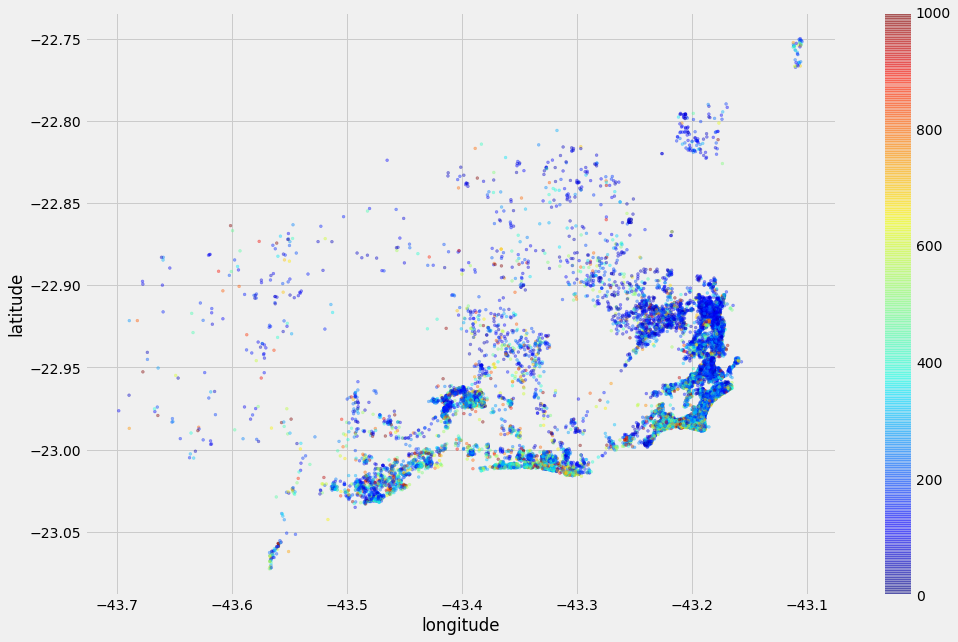

In [70]:
# plotar os imóveis pela latitude-longitude
rj_df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=rj_df_clean['price'],
              s=8, cmap=plt.get_cmap('jet'), figsize=(15,10));

Map of Neighbourhood group - Zonas


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


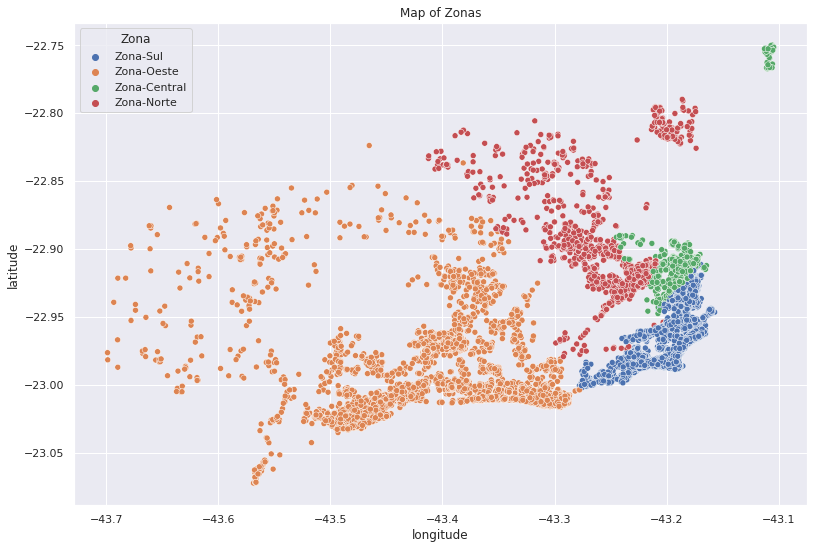

In [71]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot('longitude', 'latitude', data=rj_df, hue='Zona' )
plt.title('Map of Zonas')
plt.show()

Map of Neighbourhood by price


No handles with labels found to put in legend.


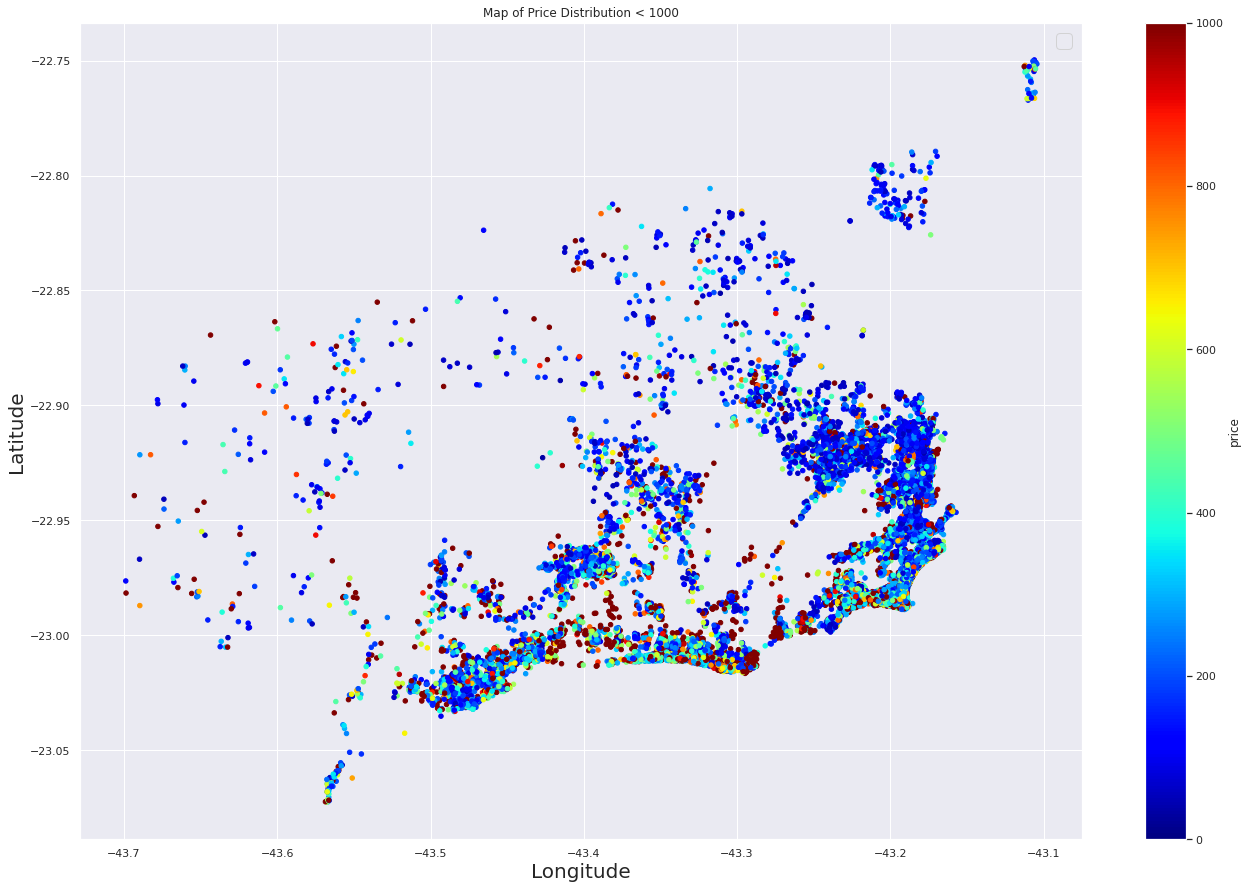

In [73]:


# plot the data
ax = rj_df.plot(
    kind="scatter", 
    x="longitude", 
    y="latitude", 
    figsize=(20,14),
    c="price", 
    cmap=plt.get_cmap("jet"),
    norm = plt.Normalize(0, 1000),

    colorbar=True, 
    alpha=1,
)
# use our map with it's bounding coordinates
          
# add axis labels
plt.ylabel("Latitude", fontsize=20)
plt.xlabel("Longitude", fontsize=20)

# set the min/max axis values - these must be the same as above
plt.title("Map of Price Distribution < 1000")
plt.legend(fontsize=20)
plt.show()

Neigbourhood Group


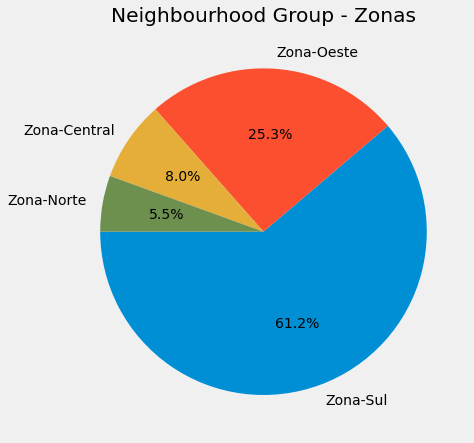

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group - Zonas")

g = plt.pie(rj_df.Zona.value_counts(), labels=rj_df.Zona.value_counts().index,autopct='%1.1f%%', startangle=180)

plt.show()

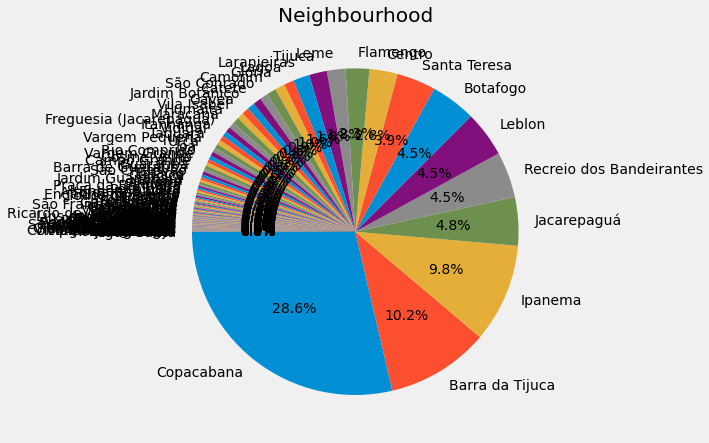

In [38]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood")
g = plt.pie(rj_df.neighbourhood.value_counts(), labels=rj_df.neighbourhood.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

No handles with labels found to put in legend.


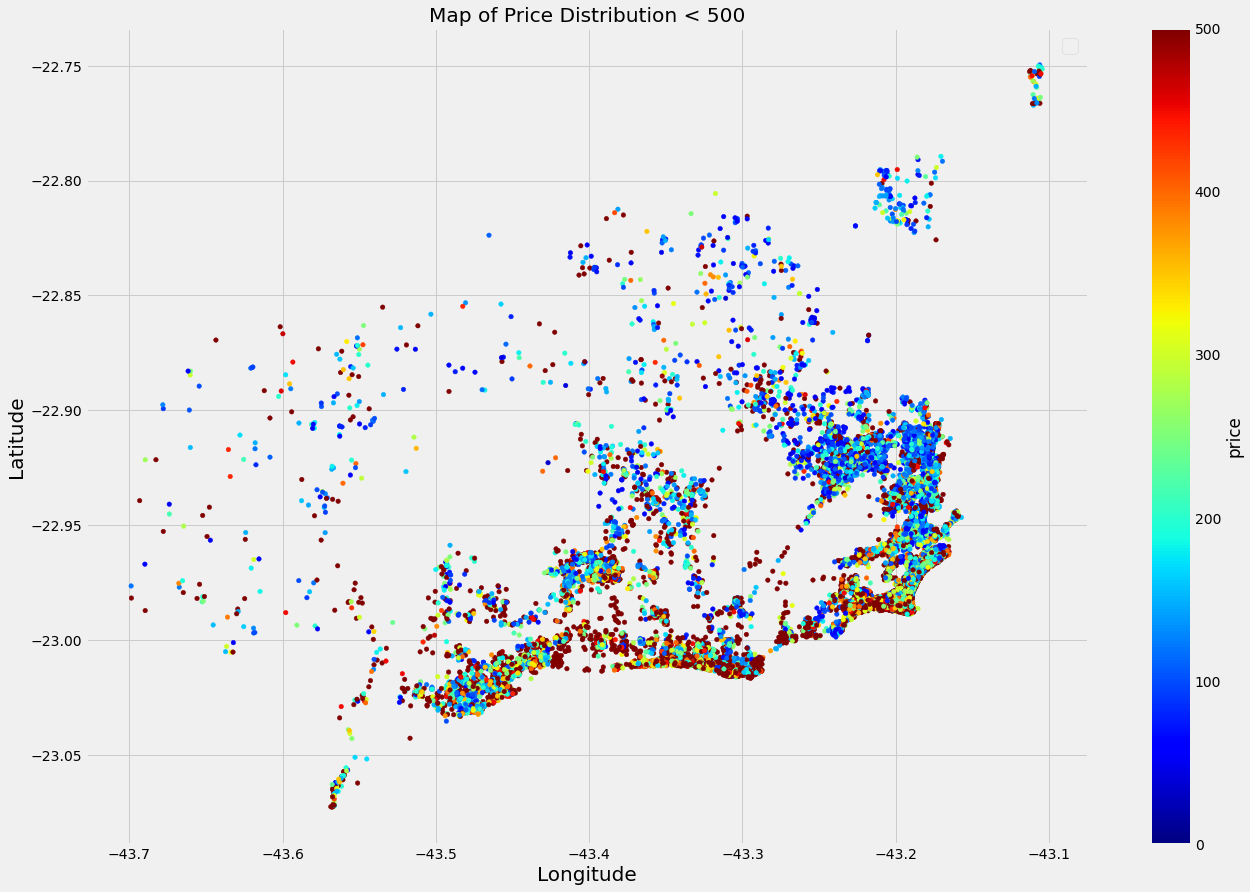

Room type on Neighbourhood Group "Zona"

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


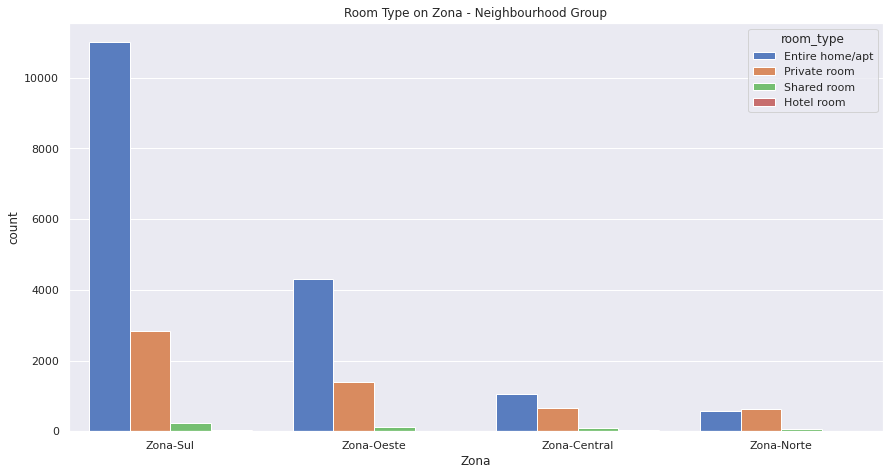

In [ ]:
plt.figure(figsize=(13,7))

plt.title("Room Type on Zona - Neighbourhood Group")

sns.countplot(rj_df.Zona,hue=rj_df.room_type,palette="muted")

Zona vs. Availability Room

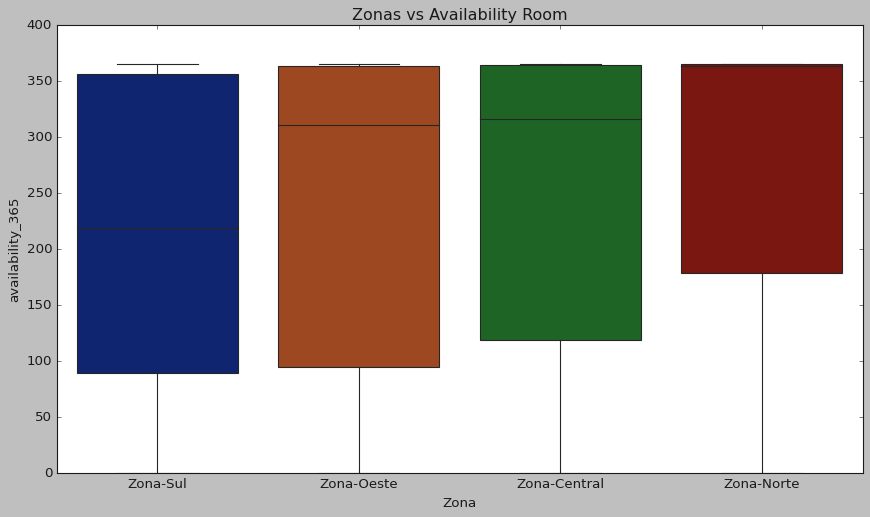

In [ ]:
plt.style.use('classic')
plt.figure(figsize=(13,7))
plt.title("Zonas vs Availability Room")

sns.boxplot(data=rj_df,x='Zona',y='availability_365',palette="dark")

plt.show()

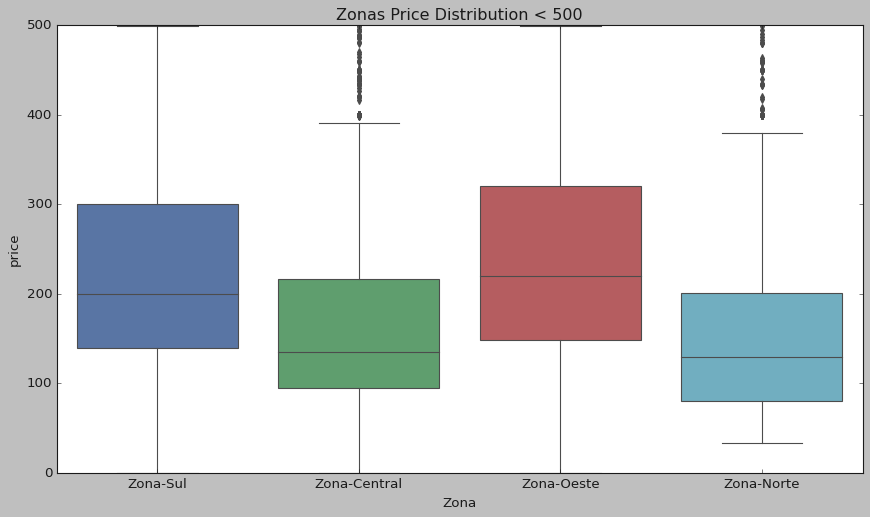

In [ ]:
plt.style.use('classic')
plt.figure(figsize=(13,7))
plt.title("Zonas Price Distribution < 500")
sns.boxplot(y="price",x ='Zona', data = rj_df[rj_df.price<500])
plt.show()

Price Prediction


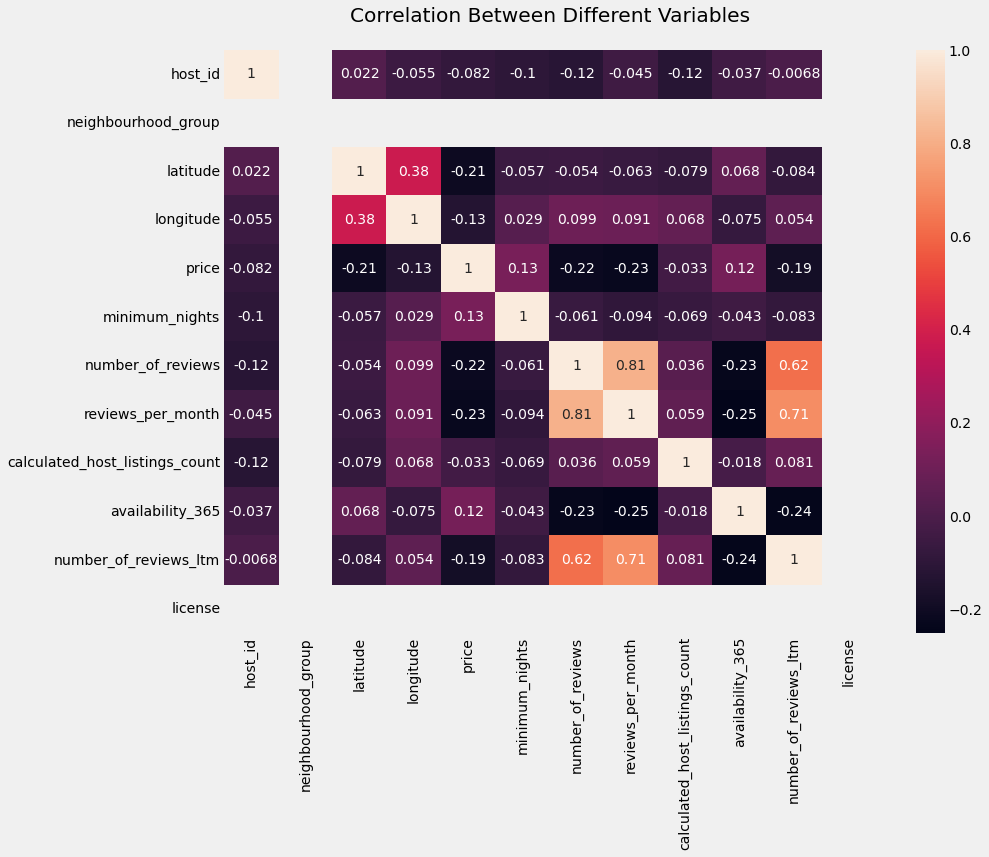

In [ ]:
corr = rj_df.corr(method='kendall')
plt.figure(figsize=(13,10))
plt.title("Correlation Between Different Variables\n")
sns.heatmap(corr, annot=True)
plt.show()

In [78]:
df_words = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2021-09-28/data/listings.csv.gz")

In [79]:
df_words.head()


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20210928134526,2021-09-28,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. <br />- Large b...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,"Rio de Janeiro, State of Rio de Janeiro, Brazil",I am a journalist/writer. Lived in NYC for ...,within an hour,100%,98%,f,https://a0.muscache.com/im/pictures/user/67b13...,https://a0.muscache.com/im/pictures/user/67b13...,Copacabana,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Rio de Janeiro, Brazil",Copacabana,NaN,-22.96599,-43.17940,Entire condominium (condo),Entire home/apt,5,NaN,1 bath,2.0,2.0,"[""Hangers"", ""Dishes and silverware"", ""Iron"", ""...",$350.00,4,180,4,4,1125,1125,4.0,1125.0,NaN,t,16,46,69,314,2021-09-28,265,12,0,2011-03-30,2021-05-21,4.68,4.78,4.63,4.82,4.90,4.76,4.65,NaN,t,1,1,0,0,2.07
1,24480,https://www.airbnb.com/rooms/24480,20210928134526,2021-09-29,"Nice and cozy near Ipanema Beach, w/ home office","My studio is located in the best of Ipanema, t...","The beach, the lagoon, Ipanema is a great loca...",https://a0.muscache.com/pictures/11955612/b28e...,99249,https://www.airbnb.com/users/show/99249,Goya,2010-03-26,"Rio de Janeiro, Rio de Janeiro, Brazil",Welcome to Rio!\nI am a human being fighting f...,within a day,50%,NaN,f,https://a0.muscache.com/im/pictures/user/6b404...,https://a0.muscache.com/im/pictures/user/6b404...,Ipanema,0.0,0.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Rio de Janeiro, Brazil",Ipanema,NaN,-22.98405,-43.20189,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Clothing storage: wardrobe"", ""Dining table"",...",$297.00,3,90,3,3,90,90,3.0,90.0,NaN,t,0,0,0,30,2021-09-29,85,0,0,2013-08-20,2017-04-22,4.73,4.83,4.78,4.90,4.90,4.97,4.58,NaN,f,1,1,0,0,0.86
2,25026,https://www.airbnb.com/rooms/25026,20210928134526,2021-09-28,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",Copacabana is a lively neighborhood and the ap...,https://a0.muscache.com/pictures/3003965/68ebb...,102840,https://www.airbnb.com/users/show/102840,Viviane,2010-04-03,"Rio de Janeiro, State of Rio de Janeiro, Brazil","Hi guys, We're a lovely team of 3 people:\r\n\...",within a day,50%,36%,f,https://a0.muscache.com/im/pictures/user/9e204...,https://a0.muscache.com/im/pictures/user/9e204...,Copacabana,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Rio de Janeiro, Brazil",Copacabana,NaN,-22.97735,-43.19105,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,2.0,"[""Kitchen"", ""Cable TV"", ""H

In [81]:
# eliminar os valores ausentes
neighborhood_overview	 = df_words.dropna(subset=['neighborhood_overview'], axis=0)['neighborhood_overview']


In [82]:
# exemplos de overviews para os bairros do Airbnb
display(neighborhood_overview	.iloc[100])
display(neighborhood_overview	.iloc[120])

"The flat is big has a wonderful view from the windows. You can see the SAMBÓDROMO, RIO - NITEROI Bridget and some slums. You can walk to the Parque das Ruinas, Chacara do Ceu Museum, always has amazing things happening. music concerts, exhibitions, theater .Santa teresa is located on top of the hill  Anyway, stay here and jump right in the Rio de Janeiro has to offer.Santa Teresa is located high on the mountain, near the Tijuca Forest. Besides being a very quiet neighborhood, it's historical and cultural heritage of the city and is characterized by harboring many artists and intellectuals. From here you can easily reach many other places known as Lapa and Center.<br />\xa0\xa0When leaving the house turn left and found two small restaurants where you can eat very well<br />A small market and another major to 10min walk<br />\xa0\xa0Pleasant, the famous restaurant frequented by several national and international artists with stunning views is just a 10 min walk from the house. $$$$$<br 

'Beach 70 meters from the apartment. Supermarket across the street. Subway station 100 meters from the building. Security people in the building 24/7.'

In [83]:
# concatenar as palavras
all_description = " ".join(s for s in neighborhood_overview	)

print("Quantidade de Palavras: {}".format(len(all_description)))

Quantidade de Palavras: 3697707


In [84]:

nltk.download('stopwords')
print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'ea

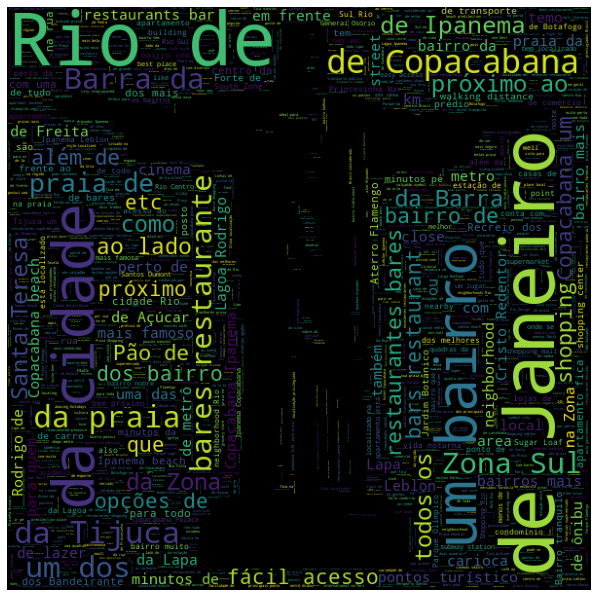

In [87]:
#stopword list
stop_words = set(stopwords.words('english'))
stop_words.update(["br"]) #Nosso problema tinham muitos 'br' soltos sem nenhum valor, dessa forma vamos retirá-los.

# img base link
rio_mask = np.array(Image.open("/content/rj.png"))
   
# generate a wordcloud
wordcloud = WordCloud(stopwords=stop_words,
                      background_color="black",
                      width=1000, height=1000, max_words=2000,
                      mask=rio_mask, max_font_size=200,
                      min_font_size=1).generate(all_description)

# final img
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
wordcloud.to_file("airbnb_summary_wordcloud.png")